In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_classification
import seaborn as sns

# Task 1:Generating Data

In [9]:
def generate_data():
    X,y = make_blobs(n_samples=60,n_features=2,centers=[[0,0],[6,6]],cluster_std=1,random_state=0)
    y = np.where(y==0,-1,1)
    
    return X,y

In [10]:
X,y = generate_data()

## Ploting the points

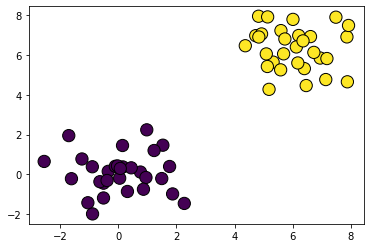

In [16]:
plt.scatter(X[:,0],X[:,1],c=y,marker='o',edgecolors='k',s=150)

# Task 2 Hinge loss

$$J(w) = \frac{1}{2} ||w||^{2} + C \sum_{i} max(0,[1 - y_{i}(w^{T}x_{i} + b)])  $$


First term is called the hinge loss

In [39]:
class SoftSVM():
    def __init__(self,C):
        self.C = C
        self.w = None
        self.b = None
        self.X = None
        self.y = None
        self.support_vectors = None
        self.n = None
        self.b = None
        
    def __decesion_function(self,X):
        return X@self.w + self.b
    
    def __cost(self,margin):
        return (1/2)*self.w.dot(self.w) + self.C * np.sum(np.maximum(0,1-margin))
    
    def __margin(self,X,y):
        return y*self.__decesion_function(X)
    
    def fit(self,X,y,lr=1e-3,epochs=500):
        self.w = np.zeros(X.shape[-1])
        self.b = 0
        
        self.X = X
        self.y = y
        
        loss_array =[]
        
        for _ in range(epochs):
            margin = self.__margin(X,y)
            lass = self.__cost(margin)
            
            loss_array.append(lass)
            
            missclassified_points = np.where(margin<1)[0]
            
            d_w = self.w - self.C*(y[missclassified_points].dot(X[missclassified_points]))
            self.w -= lr*d_w
            
            d_b = -self.C*(np.sum(y[missclassified_points]))
            self.b -= lr*d_b
        self.support_vectors = np.where(self.__margin(X,y)<=1)[0]
        
        return loss_array,self.support_vectors
    
    def predict(self,X):
        return np.sign(self.__decesion_function(X))
        
    def score(self,X,y):
        P = self.predict(X)
        return np.mean(P)
        
    def plot_decesion_boundary(self,X,y):
            plt.scatter(self.X[:,0],self.X[:,1],c = self.y,marker='o',s=100,cmap='autumn')
            ax = plt.gca()
            xlim = ax.get_xlim()
            ylim = ax.get_ylim()
            
            xx = np.linspace(xlim[0],xlim[1],30)
            yy = np.linspace(ylim[0],ylim[1],30)
            
            YY,XX = np.meshgrid(yy,xx)
            
            xy = np.vstack([XX.ravel(),YY.ravel()]).T
            Z = self.__decesion_function(xy).reshape(XX.shape)
            
            
            
            ax.contour(XX,YY,Z,colors=['g','k','g'],levels=[-1,0,1],linestyles=['--','-','--'],linewidths = [2.0,2.0,2.0])
            
            
            ax.scatter(self.X[:,0][self.support_vectors],self.X[:,1][self.support_vectors],s=250,linewidth=1,
                      facecolor='none',edgecolor='k')
            
            plt.xlabel("x1")
            plt.ylabel('x2')
            
            plt.show()
            

In [40]:
svm = SoftSVM(C=1)

In [41]:
loss,suport = svm.fit(X,y)

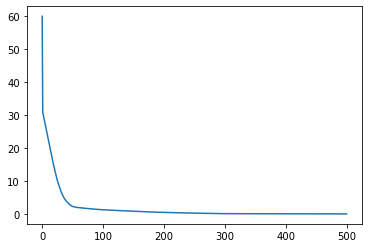

In [42]:
plt.plot(loss)

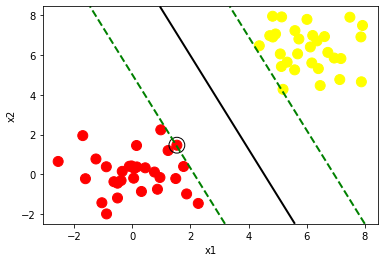

In [43]:
svm.plot_decesion_boundary(X,y)

In [46]:
X[:,0][suport],X[:,1][suport]

(array([1.53277921]), array([1.46935877]))

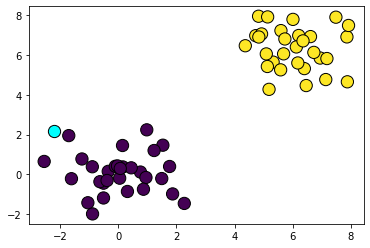

In [48]:
new_Example = np.array([-2.2,2.2])
plt.scatter(X[:,0],X[:,1],c=y,marker='o',edgecolors='k',s=150)
plt.scatter(new_Example[0],new_Example[1],marker='o',edgecolors='k',s=150,c='cyan')

In [49]:
svm.predict(new_Example)

-1.0

# Linearly seperable classes with noise

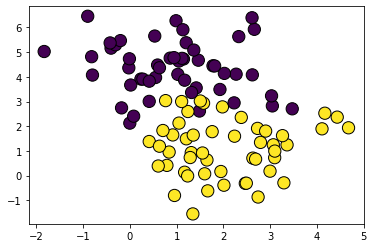

In [51]:
X,y = make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=1.1)
plt.scatter(X[:,0],X[:,1],c=y,marker='o',edgecolors='k',s=150)
y = np.where(y==0,-1,1)

[ 0.31051347 -1.63118642] 3.710000000000005


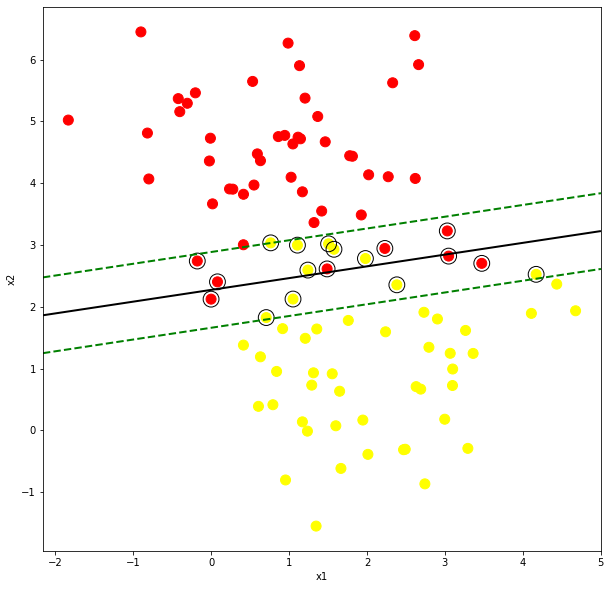

In [58]:
svm = SoftSVM(C=10)
l,s = svm.fit(X,y)
print(svm.w,svm.b)
plt.figure(figsize=(10,10))
svm.plot_decesion_boundary(X,y)

# Linearly non-seperable data

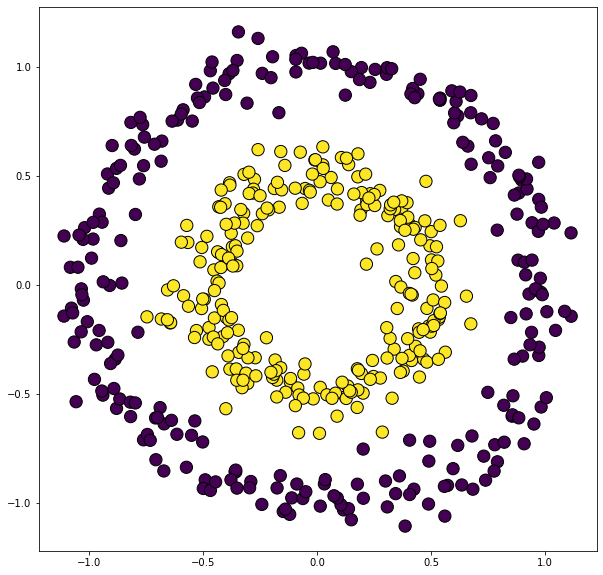

In [61]:
from sklearn.datasets import make_circles
X,y = make_circles(500,factor=.5,noise=0.08)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=y,marker='o',edgecolors='k',s=150)
y = np.where(y==0,-1,1)
